In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:

#print("Features: ", cancer.feature_names)
print('Total Features',len(cancer.feature_names))


print('No of classes',len(cancer.target_names))
#print("Labels: ", cancer.target_names)

Total Features 30
No of classes 2


In [ ]:
# shape of the dataset
cancer.data.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42) # 70% training and 30% test

In [ ]:
from sklearn import svm
from sklearn.decomposition import PCA

"""
kernal = precomputed , sigmoid , rbf, linear 
default is rbf ( non linear will be good )
for linear go for linear kernal 



gamma is 'scale', i.e. gamma = 1 / (n_features * X.var())
gama is 'auto' 


C value if of number 
large C value  -  REDUCE MIS CLASSIFICATION RATE  ( BUT ALSO MAY OVERFIT THE DATA )
Small C value  - DONT CONSIDER THE MISCLASSIFICATION

"""
classifier=svm.SVC(kernel='rbf',C=1000,gamma='scale',decision_function_shape='ovo')  
pca = PCA(n_components = 2)
x_train = pca.fit_transform(X_train)
x_test = pca.fit_transform(X_test)
training=classifier.fit(x_train,y_train)

prediction=classifier.predict(x_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8421052631578947


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction,target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.74      0.87      0.80        63
      benign       0.92      0.82      0.87       108

    accuracy                           0.84       171
   macro avg       0.83      0.85      0.84       171
weighted avg       0.85      0.84      0.84       171



In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

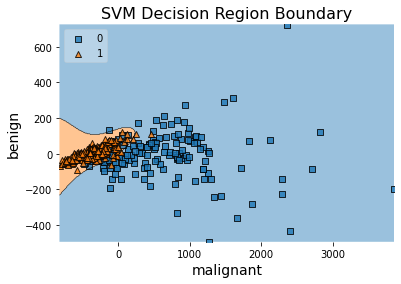

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X=x_train, 
                      y=y_train,
                      clf=classifier,
                      legend=2)
plt.xlabel('malignant', size=14)

plt.ylabel('benign', size=14)
plt.title('SVM Decision Region Boundary', size=16)
